In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df_iris['species'] = iris.target
df_iris['species'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_iris.info()

df_iris.describe()

df_iris['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


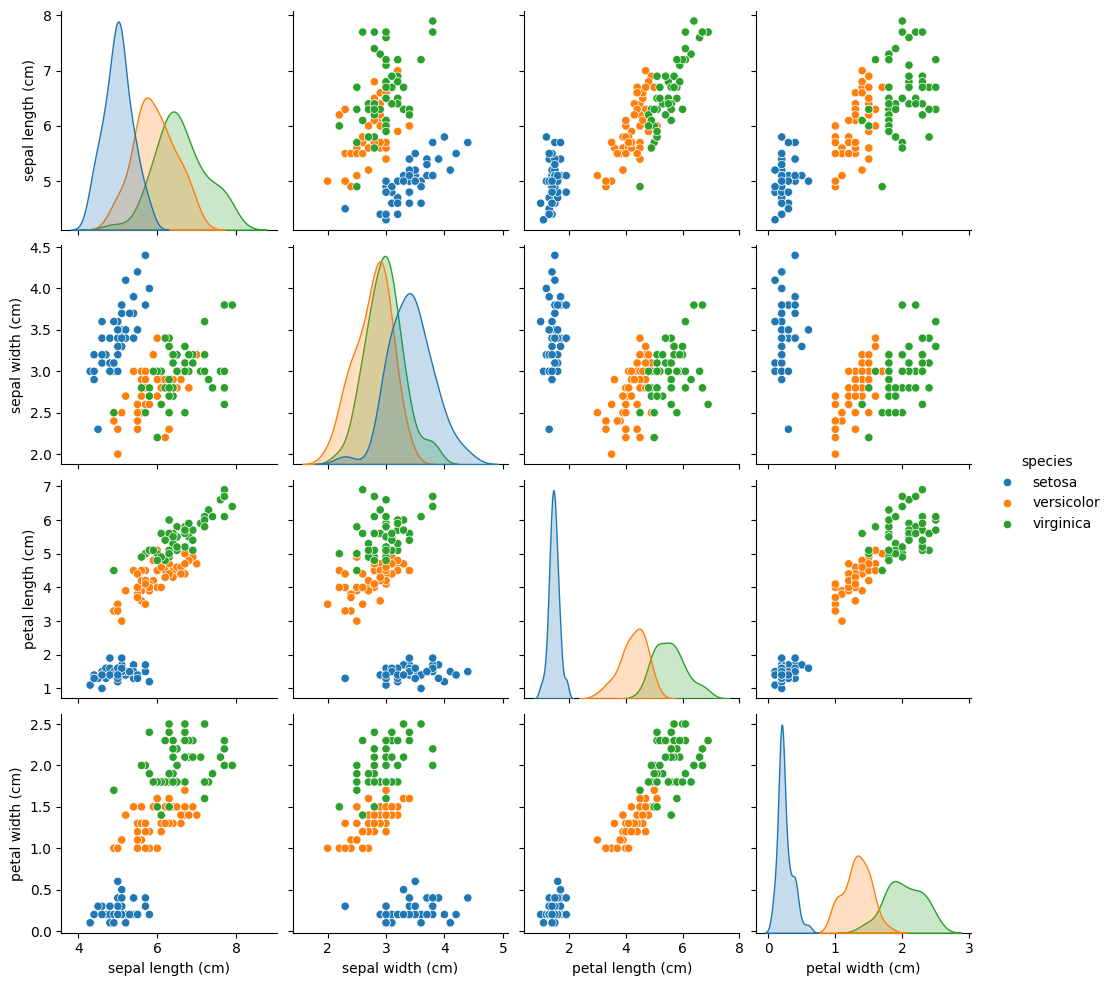

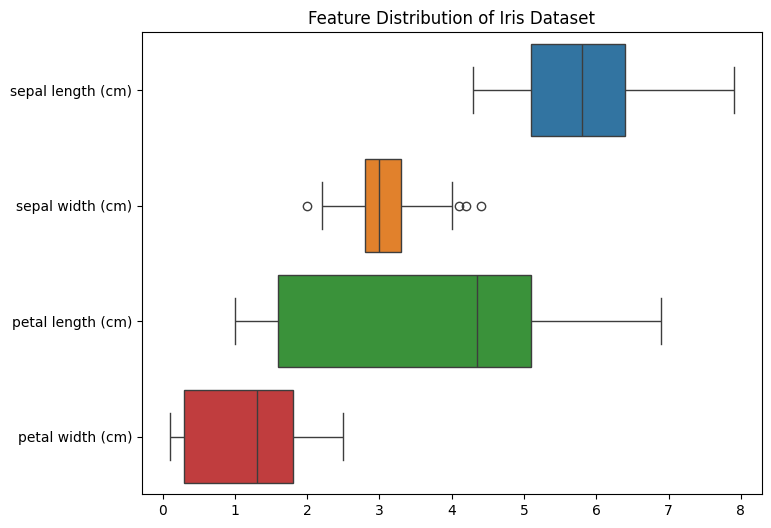

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_iris, hue="species", diag_kind="kde")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_iris, orient='h')
plt.title("Feature Distribution of Iris Dataset")
plt.show()

In [ ]:
df_iris.to_csv("iris_dataset.csv", index=False)
print("Iris dataset saved as 'iris_dataset.csv'")

Iris dataset saved as 'iris_dataset.csv'


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
nvda = yf.download("NVDA", period="1y")

nvda.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-03-18,88.425949,92.374649,87.056396,90.358313,668976000
2024-03-19,89.368637,90.514257,84.982078,86.671518,672171000
2024-03-20,90.342316,90.380305,88.194020,89.767500,479063000
2024-03-21,91.404961,92.617567,90.375300,92.269682,480372000
2024-03-22,94.258026,94.746864,90.804159,91.111058,586719000


In [ ]:
nvda.info()

nvda.describe()

nvda.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-03-18 to 2025-03-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   251 non-null    float64
 1   (High, NVDA)    251 non-null    float64
 2   (Low, NVDA)     251 non-null    float64
 3   (Open, NVDA)    251 non-null    float64
 4   (Volume, NVDA)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


,,0
Price,Ticker,
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


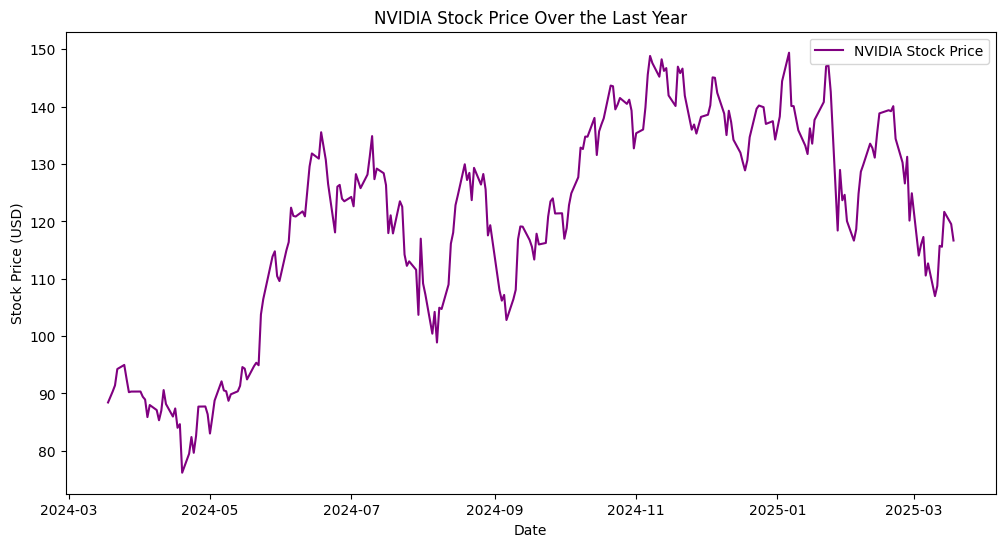

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(nvda.index, nvda['Close'], label="NVIDIA Stock Price", color='purple')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("NVIDIA Stock Price Over the Last Year")
plt.legend()
plt.show()

In [ ]:
nvda.to_csv("nvidia_stock_data.csv")
print("NVIDIA stock data saved as 'nvidia_stock_data.csv'")

NVIDIA stock data saved as 'nvidia_stock_data.csv'


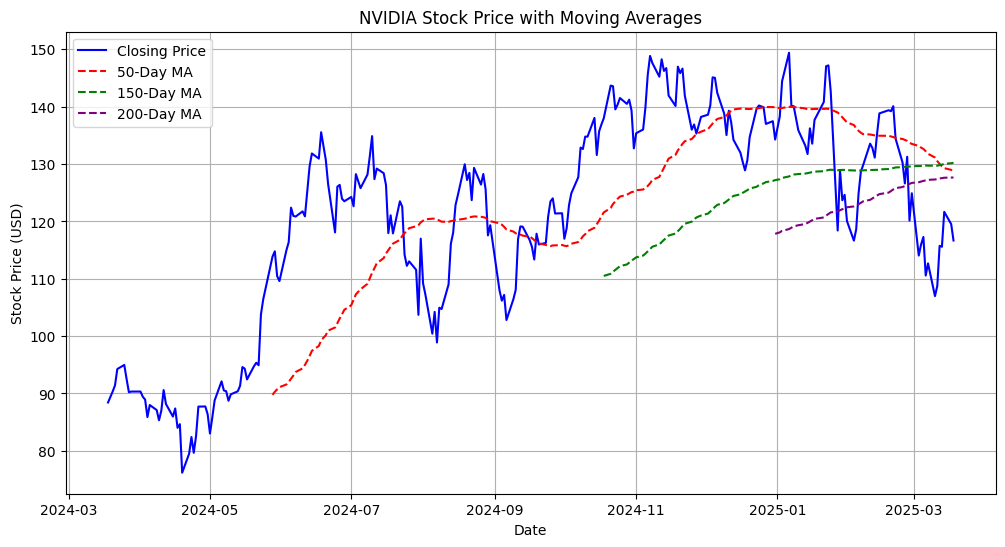

In [ ]:
import matplotlib.pyplot as plt

# Create Moving Averages
nvda['50_MA'] = nvda['Close'].rolling(window=50).mean()  # 50-day moving average
nvda['150_MA'] = nvda['Close'].rolling(window=150).mean()  # 150-day moving average
nvda['200_MA'] = nvda['Close'].rolling(window=200).mean()  # 200-day moving average

# Plot
plt.figure(figsize=(12, 6))
plt.plot(nvda.index, nvda['Close'], label="Closing Price", color='blue', linewidth=1.5)
plt.plot(nvda.index, nvda['50_MA'], label="50-Day MA", color='red', linestyle="dashed")
plt.plot(nvda.index, nvda['150_MA'], label="150-Day MA", color='green', linestyle="dashed")
plt.plot(nvda.index, nvda['200_MA'], label="200-Day MA", color='purple', linestyle="dashed")

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

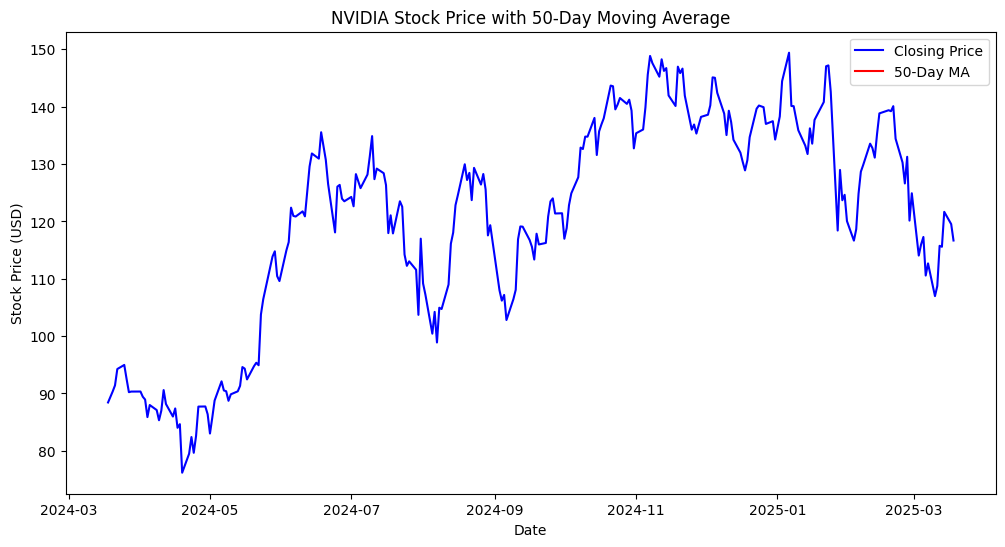

In [ ]:
nvda['50_MA'] = nvda['Close'].rolling(window=50).mean()  # 50-day moving average
plt.figure(figsize=(12, 6))
plt.plot(nvda.index, nvda['Close'], label="Closing Price", color='blue')
plt.plot(nvda.index, nvda['50_MA'], label="50-Day MA", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("NVIDIA Stock Price with 50-Day Moving Average")
plt.legend()
plt.show()

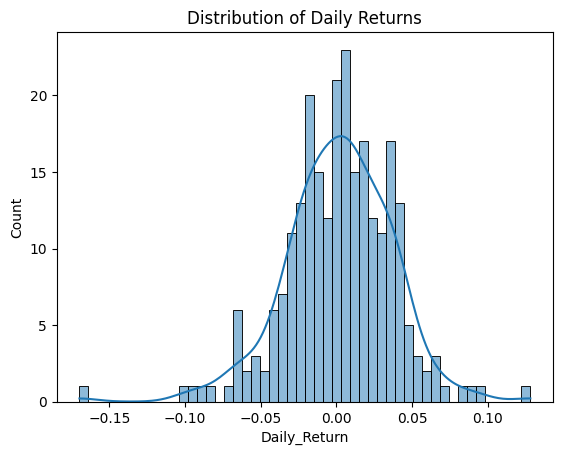

In [ ]:
nvda['Daily_Return'] = nvda['Close'].pct_change()
sns.histplot(nvda['Daily_Return'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()